# Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = train_df.copy()
len(df['Sex'].unique())

2

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# features with na
df = train_df.copy()
na_features = [features for features in df.columns if (df[features].isna().sum())]
print(na_features)

#count of features with na
na_features_count = {features:df[features].isna().sum() for features in na_features}
na_features_count = dict(sorted(na_features_count.items(), key = lambda ele: ele[1]))
print(na_features_count)

['Age', 'Cabin', 'Embarked']
{'Embarked': 2, 'Age': 177, 'Cabin': 687}


0    549
1    342
Name: Survived, dtype: int64

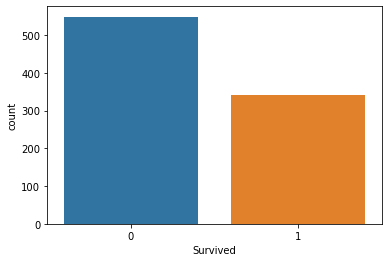

In [6]:
# plotting survival counts
sns.countplot(x='Survived',data=train_df)
train_df['Survived'].value_counts()

# Numerical variables

In [7]:
df = train_df.copy()
numerical_features = df.select_dtypes(exclude='O').columns
print("Total numerical features: ",len(numerical_features))

df[numerical_features]

Total numerical features:  7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


## Discrete variables

In [8]:
discrete_numerical_features = [features for features in numerical_features if len(df[features].unique())<25]
print(discrete_numerical_features)

discrete_numerical_features_count = {features:len(df[features].unique()) for features in discrete_numerical_features}
discrete_numerical_features_count

['Survived', 'Pclass', 'SibSp', 'Parch']


{'Survived': 2, 'Pclass': 3, 'SibSp': 7, 'Parch': 7}

3    491
1    216
2    184
Name: Pclass, dtype: int64


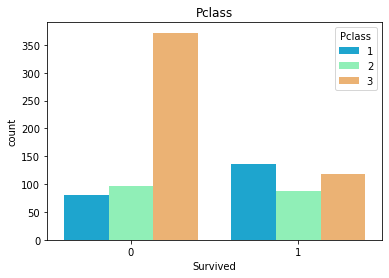

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


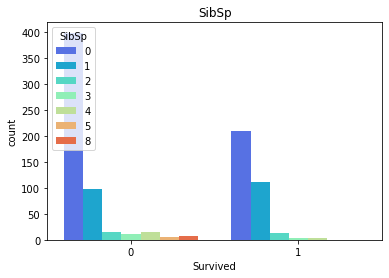

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


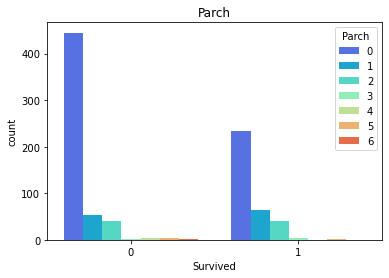

In [9]:
for features in discrete_numerical_features:
    if features not in 'Survived':
        print(df[features].value_counts())
        sns.countplot(x='Survived',hue=features,data=df,palette='rainbow')
        plt.title(features)
        plt.show()

    Poor people died more because Rich people paid money and succeed in escaping
    Those people who does not have any sibling or spouse died more.
    Those people who does not have any parent or child died 
    
 ### Pclass is an ordinal variable


## Continuous variables

In [10]:
continuous_numerical_features = [features for features in numerical_features if features not in discrete_numerical_features]
continuous_numerical_features

['PassengerId', 'Age', 'Fare']

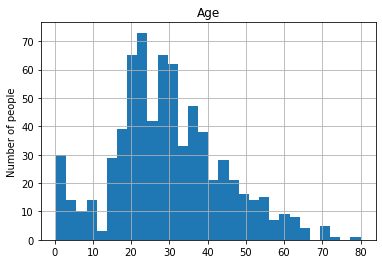

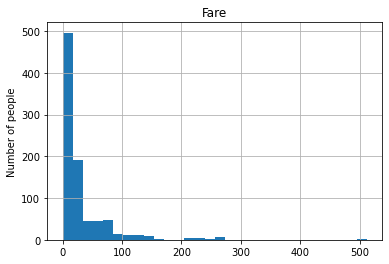

In [11]:
for features in continuous_numerical_features:
    if features not in 'PassengerId':
        df[features].hist(bins=30)
        plt.title(features)
        plt.ylabel('Number of people')
        plt.show()

# Categorical Variable

In [12]:
categorical_features = df.select_dtypes(include='O').columns
print("Total number of categorical feature: ",len(categorical_features))

categorical_features_count = {features:len(df[features].unique()) for features in categorical_features}
categorical_features_count

Total number of categorical feature:  5


{'Name': 891, 'Sex': 2, 'Ticket': 681, 'Cabin': 148, 'Embarked': 4}

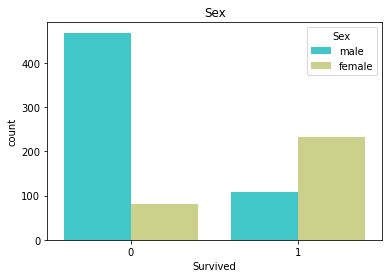

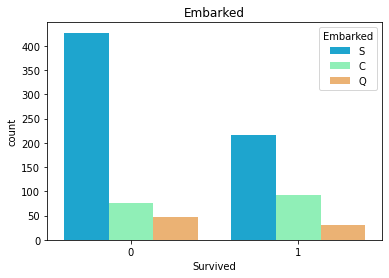

In [13]:
for features in categorical_features:
    if features not in 'Name'+'Ticket'+'Cabin':
        sns.countplot(x='Survived',hue=features,data=df,palette='rainbow')
        plt.title(features)
        plt.show()

In [14]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Male died more then women

# Feature Engineering

First of all I'm dropping some columns because they will not be useful for prediction

In [15]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
na_features

['Age', 'Cabin', 'Embarked']

## Filling the missing value

In [18]:
mean_age = df.groupby(['Sex'])['Age'].mean()
mean_age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [19]:
df['Age'] = np.where(df['Sex']=='male',31,28)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,31,1,0,7.2500,S
1,1,1,female,28,1,0,71.2833,C
2,1,3,female,28,0,0,7.9250,S
3,1,1,female,28,1,0,53.1000,S
4,0,3,male,31,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,31,0,0,13.0000,S
887,1,1,female,28,0,0,30.0000,S
888,0,3,female,28,1,2,23.4500,S
889,1,1,male,31,0,0,30.0000,C


In [20]:
# a = df.groupby('Sex')['Age'].mean()
df['Embarked'].mode()

0    S
dtype: object

In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
# now we don't have any null values

# Feature Engineering

### One hot encoding

In [24]:
for features in categorical_features:
    if features not in 'Name'+'Ticket'+'Cabin':
        dummy = pd.get_dummies(df[features],drop_first=True)
        df = pd.concat([df,dummy],axis=1)
        df.drop(columns=[features],axis=1,inplace=True)
        

In [25]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,31,1,0,7.2500,1,0,1
1,1,1,28,1,0,71.2833,0,0,0
2,1,3,28,0,0,7.9250,0,0,1
3,1,1,28,1,0,53.1000,0,0,1
4,0,3,31,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,31,0,0,13.0000,1,0,1
887,1,1,28,0,0,30.0000,0,0,1
888,0,3,28,1,2,23.4500,0,0,1
889,1,1,31,0,0,30.0000,1,0,0


In [26]:
# min_max = MinMaxScaler()
# scaled_data = min_max.fit_transform(df)
# df = pd.DataFrame(scaled_data,columns=df.columns)
# df

In [28]:
X = df.drop('Survived',axis=1)
y=df['Survived']

[0.09129025 0.36289849 0.06582791 0.07177171 0.3733073  0.
 0.00601768 0.02888667]


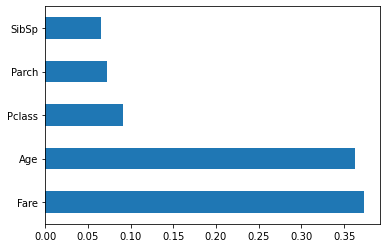

In [29]:
from sklearn.tree import ExtraTreeClassifier
tree_reg = ExtraTreeClassifier()
tree_reg.fit(X,y)
print(tree_reg.feature_importances_)

#Top 5 important feature
features_importance = pd.Series(tree_reg.feature_importances_,index=X.columns)
features_importance.nlargest(5).plot(kind='barh')
plt.show()

In [27]:
df.to_csv('train_refined.csv')

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
model = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
model_cv = RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='accuracy',cv=5,random_state = 42,n_iter=10)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.8100558659217877